In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
df=pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [6]:
for col in df.columns:  # Iterating over column names
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in person_age: [ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.]
Unique values in person_gender: ['female' 'male']
Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values in person_income: [71948. 12282. 12438. ... 31924. 56942. 33164.]
Unique values in person_emp_exp: [  0   3   1   5   4   2   7   6 125   8 121 101 100  12  10   9  14  13
  11  15  16  17  19  28  25  18  24  22  20  23  21  31  26  27  29  32
  30 124  40  43  33  44  34  42  37  45  36  41  47  38  39  35  57  46
  49  48  50  76  62  61  58  93  85]
Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in loan_amnt: [35000.  1000.  5500. ... 12229.  2771.  6665.]


Checking for outliers

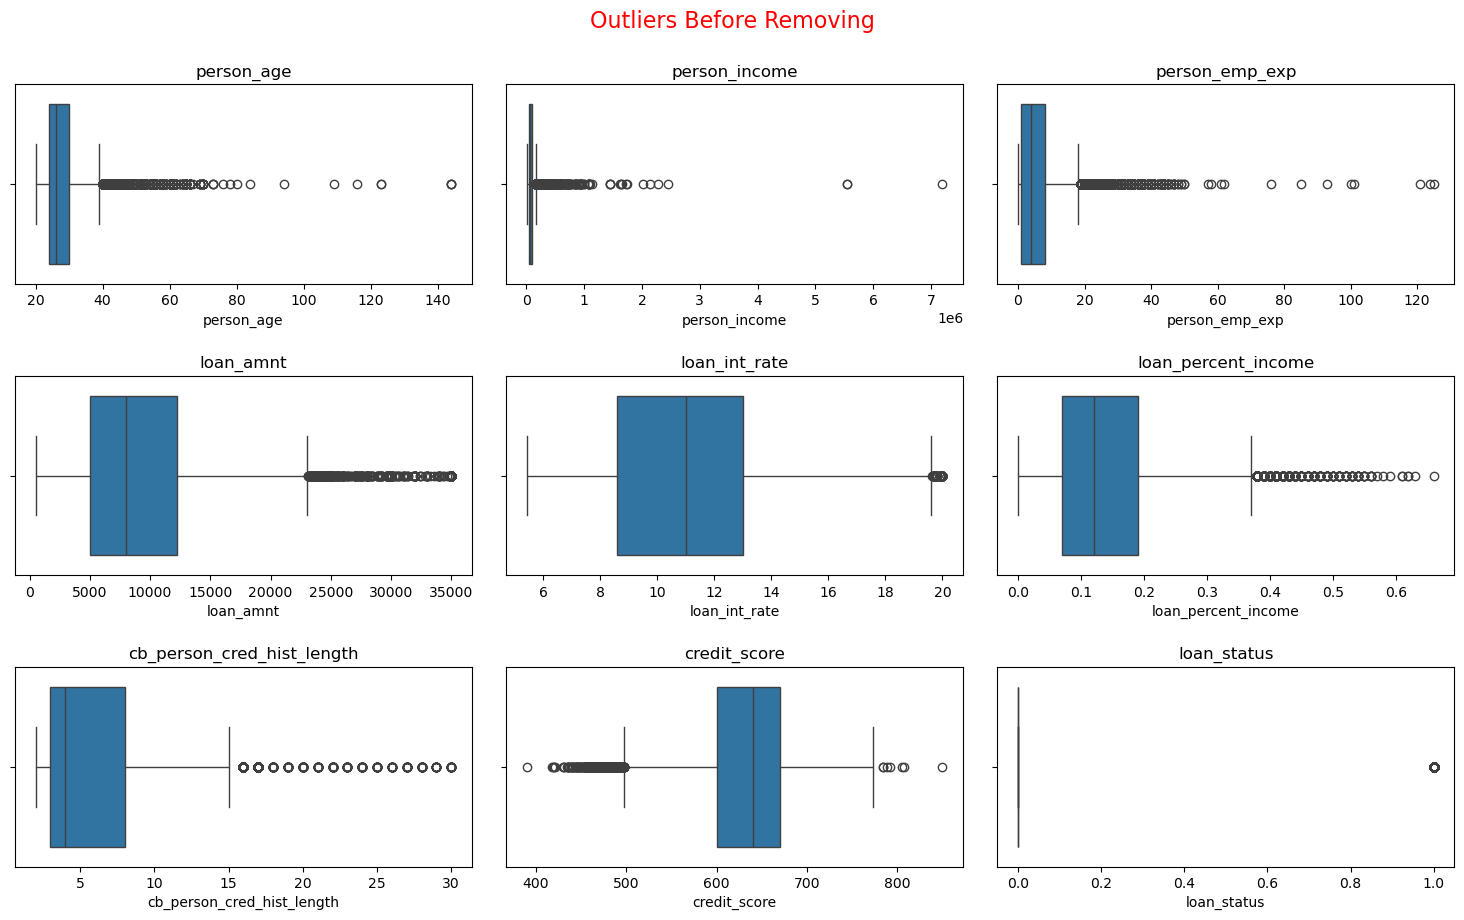

In [7]:
num_cols = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(15, 12))
plt.suptitle("Outliers Before Removing", fontsize=16,color='red')

for i, col in enumerate(num_cols, 1): 
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout(pad=2.0) 

plt.show()


removing the outliers

In [8]:
def remove_outliers_iqr(data):
    """
    Remove outliers from a 1D NumPy array using the IQR method.
    
    Parameters:
        data (np.ndarray): Input array.
        
    Returns:
        np.ndarray: Array with outliers removed.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]


In [9]:
for col in df.select_dtypes(include=['int', 'float']):
    df[col] = remove_outliers_iqr(df[col])



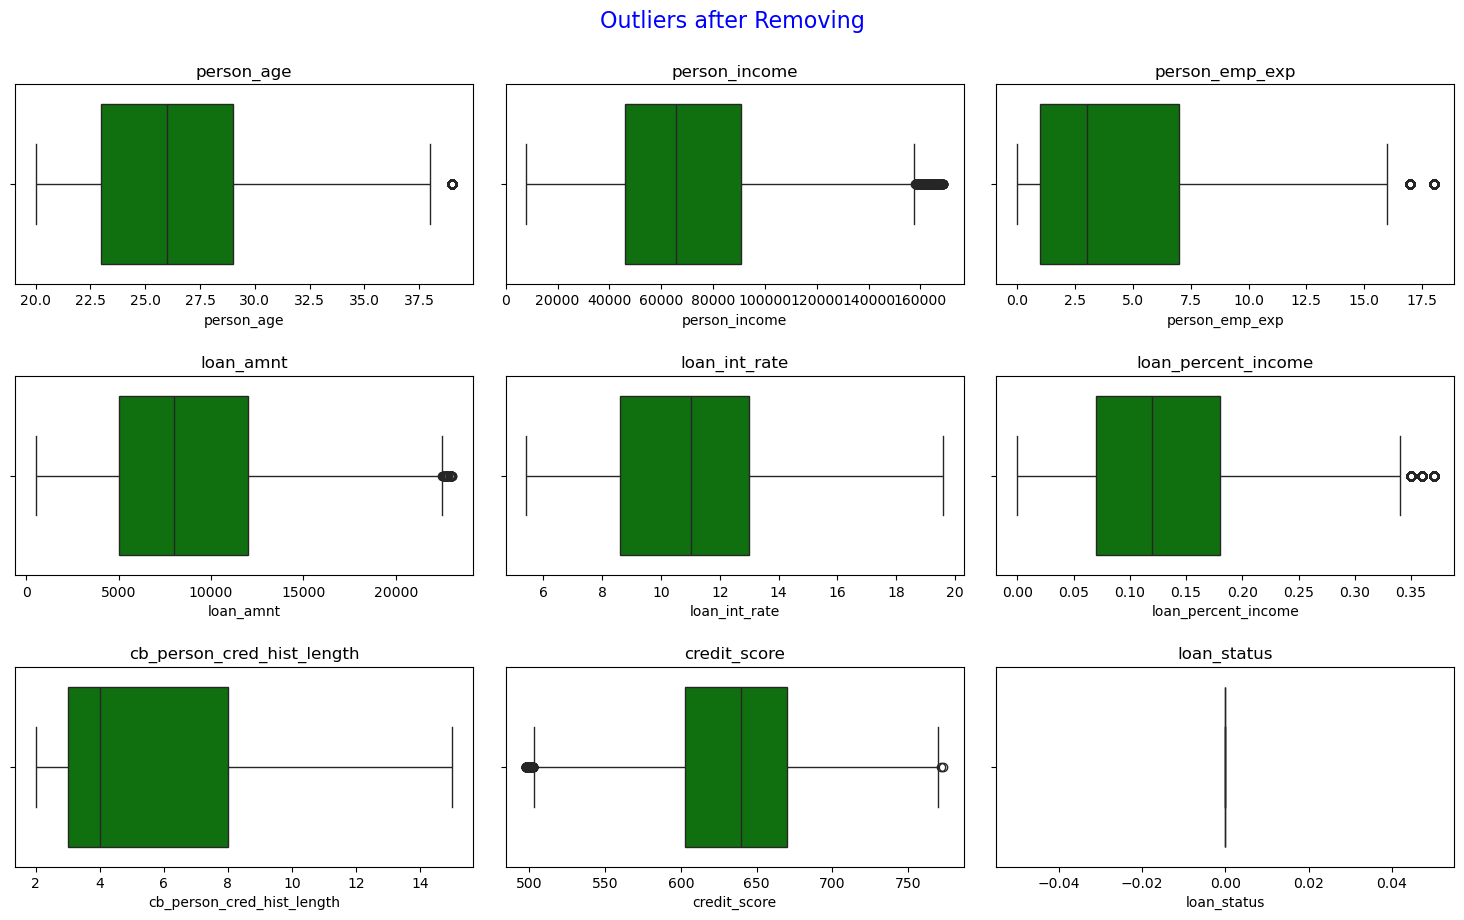

In [10]:
num_cols = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(15, 12))
plt.suptitle("Outliers after Removing", fontsize=16,color='blue')

for i, col in enumerate(num_cols, 1): 
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col],color="green")
    plt.title(col)
    plt.tight_layout(pad=2.0) 

plt.show()


In [11]:
le=LabelEncoder()

In [12]:
col={"previous_loan_defaults_on_file","loan_intent","person_home_ownership","person_education","person_gender"}

for col in df.columns:
    df[col]=le.fit_transform(df[col])
print("Label encoding done!")
le

Label encoding done!


LabelEncoder()

In [13]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,2,0,4,17666,0,3,4190,4,1055,38,1,63,0,1
1,1,0,3,69,0,2,10,1,567,8,0,6,1,0
2,5,0,3,75,3,0,1422,3,740,38,1,137,0,1
3,3,0,1,20271,0,3,4190,3,976,38,0,177,0,1
4,4,1,4,15770,1,3,4190,3,880,38,2,88,0,1


In [14]:
for col in df.columns:  
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in person_age: [ 2  1  5  3  4  6 20  0 12 14  9 13  8 15 11  7 10 16 17 19 18]
Unique values in person_gender: [0 1]
Unique values in person_education: [4 3 1 0 2]
Unique values in person_income: [17666    69    75 ...  3029 12260  3353]
Unique values in person_emp_exp: [ 0  3  1  5  4  2  7  6 19  8 12 10  9 14 13 11 15 16 17 18]
Unique values in person_home_ownership: [3 2 0 1]
Unique values in loan_amnt: [4190   10 1422 ... 3080  537 1807]
Unique values in loan_intent: [4 1 3 5 2 0]
Unique values in loan_int_rate: [1055  567  740 ... 1278 1273 1138]
Unique values in loan_percent_income: [38  8 19 37 35 13 34 30 27 25  5 24 31 26 12 18 21 11 32 10 22  7  2 17
 33  6  3 28  4  9 20 23 15 14  1 29 36 16  0]
Unique values in cb_person_cred_hist_length: [ 1  0  2  6  5  4  7  8  3  9 14 13 10 11 12]
Unique values in credit_score: [ 63   6 137 177  88  34 203  87  46 142 123 153  75 210  85 172 165 196
 211 181 186 164 193 102 156 128 109 202  55  91 183  69 171 108  84 151

In [15]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [16]:
df.shape

(45000, 14)

In [17]:
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [18]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
lg=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=3)
sv=SVC()
rf=RandomForestClassifier(n_estimators=300)



In [20]:
models={
    "LogisticRegression": lg,
    "DecisionTreeClassifier":dt,
    "SVC":sv,
    "RandomForestClassifier":rf,
    
    
}
models

{'LogisticRegression': LogisticRegression(),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=3),
 'SVC': SVC(),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=300)}

In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)  
    print(f"{name} training completed")
models

c:\Users\Sahib Chouhan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression training completed
DecisionTreeClassifier training completed
SVC training completed
RandomForestClassifier training completed


{'LogisticRegression': LogisticRegression(),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=3),
 'SVC': SVC(),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=300)}

In [22]:
scores = {}
for name, model in models.items():
    accuracy = model.score(X_test, y_test)  
    scores[name] = accuracy

print(scores)  

{'LogisticRegression': 0.8265555555555556, 'DecisionTreeClassifier': 0.8932222222222223, 'SVC': 0.8138888888888889, 'RandomForestClassifier': 0.9272222222222222}


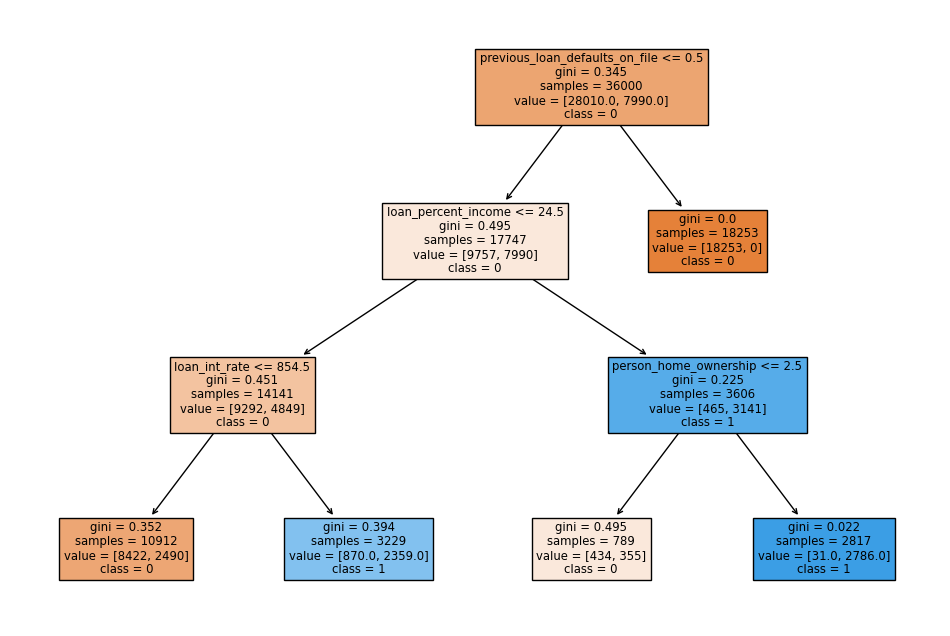

In [23]:
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=x.columns, class_names=[str(cls) for cls in set(y)], filled=True)
plt.show()


LogisticRegression Evaluation:

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6990
           1       0.66      0.46      0.54      2010

    accuracy                           0.83      9000
   macro avg       0.76      0.70      0.72      9000
weighted avg       0.81      0.83      0.81      9000



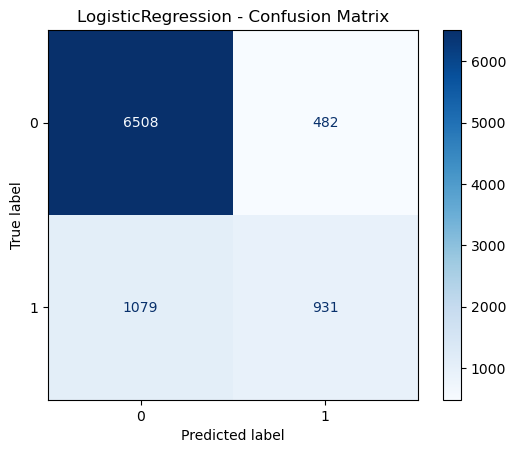


DecisionTreeClassifier Evaluation:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6990
           1       0.85      0.64      0.73      2010

    accuracy                           0.89      9000
   macro avg       0.87      0.80      0.83      9000
weighted avg       0.89      0.89      0.89      9000



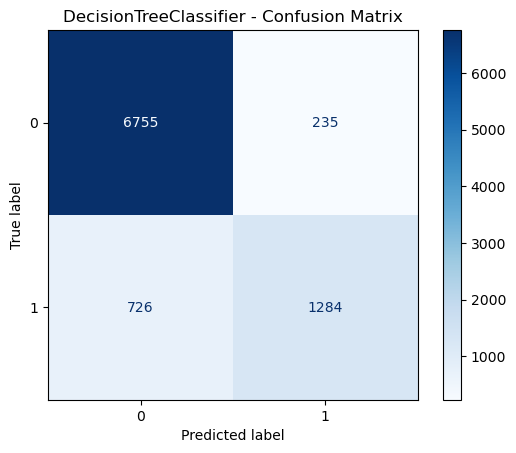


SVC Evaluation:

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6990
           1       0.72      0.28      0.40      2010

    accuracy                           0.81      9000
   macro avg       0.77      0.62      0.64      9000
weighted avg       0.80      0.81      0.78      9000



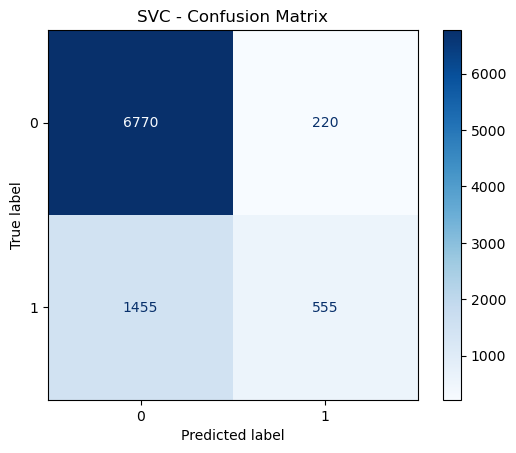


RandomForestClassifier Evaluation:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



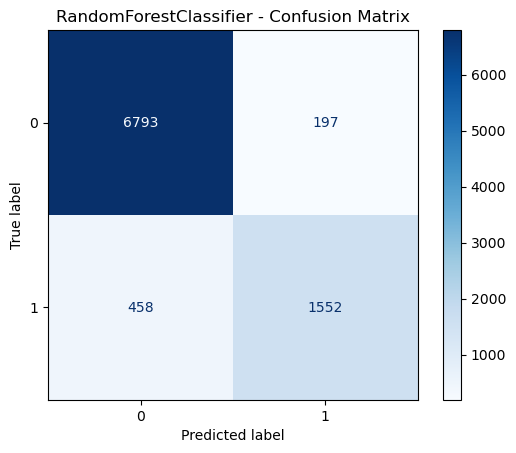

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models.items():
    print(f"\n{name} Evaluation:\n")
    y_pred = model.predict(X_test)

    
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [25]:
rf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
for col in df.columns:  
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in person_age: [ 2  1  5  3  4  6 20  0 12 14  9 13  8 15 11  7 10 16 17 19 18]
Unique values in person_gender: [0 1]
Unique values in person_education: [4 3 1 0 2]
Unique values in person_income: [17666    69    75 ...  3029 12260  3353]
Unique values in person_emp_exp: [ 0  3  1  5  4  2  7  6 19  8 12 10  9 14 13 11 15 16 17 18]
Unique values in person_home_ownership: [3 2 0 1]
Unique values in loan_amnt: [4190   10 1422 ... 3080  537 1807]
Unique values in loan_intent: [4 1 3 5 2 0]
Unique values in loan_int_rate: [1055  567  740 ... 1278 1273 1138]
Unique values in loan_percent_income: [38  8 19 37 35 13 34 30 27 25  5 24 31 26 12 18 21 11 32 10 22  7  2 17
 33  6  3 28  4  9 20 23 15 14  1 29 36 16  0]
Unique values in cb_person_cred_hist_length: [ 1  0  2  6  5  4  7  8  3  9 14 13 10 11 12]
Unique values in credit_score: [ 63   6 137 177  88  34 203  87  46 142 123 153  75 210  85 172 165 196
 211 181 186 164 193 102 156 128 109 202  55  91 183  69 171 108  84 151

In [27]:
rf.predict([[45,1,0,200000,30,2,20000,4,4.0,0.22,5,799,0]])

c:\Users\Sahib Chouhan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [28]:
X_test

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
37979,12,1,0,24469,10,0,2023,1,57,8,8,103,0
9911,4,1,0,12243,6,3,2417,1,602,16,2,149,1
43386,2,0,4,4810,0,3,1276,3,941,13,2,213,0
13822,3,0,1,5696,1,2,1276,5,852,13,1,99,1
44810,20,1,3,16492,19,0,2657,2,994,15,9,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,1,1,1,29795,0,0,3351,5,452,11,0,156,0
30384,19,1,3,14222,17,3,1819,1,1096,11,9,108,1
36665,4,0,4,19932,1,3,3351,1,618,18,1,116,0
30569,18,1,0,4694,16,3,2169,3,554,22,12,197,0


In [29]:
rf.predict([[4,	1,	0,	12243,	6,	3,	2417,	1,	602,	16,	2,	149,	1,]])

c:\Users\Sahib Chouhan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [30]:
lg.predict([[20,	1,	3,	16492,	19,	0	,2657,	2,	994,	15,	9,	88,	0]])

c:\Users\Sahib Chouhan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [35]:
nb.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
nb.score(X_test,y_test)

0.8773333333333333

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [39]:
knn.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
knn.score(X_test,y_test)

0.8573333333333333